In [1]:
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_Interactivity = 'all'

In [2]:
ls

Ensemble methods_Voting classifier.py   ensemble method_4 types camparision.py
Test.csv                                heart.csv
Train.csv                               run.ipynb
diabetes.csv                            test.ipynb


In [4]:
#Import the data
train=pd.read_csv('heart.csv')     #讀入資料檔
print('total train data: ' + str(train.shape))
print(train.info())
print(train.describe())
print(train.isnull().sum())    # No missing values found.
for i in train.columns:
    print( i , ':', train[i].nunique())
print(train.head())

total train data: (303, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
              age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.6

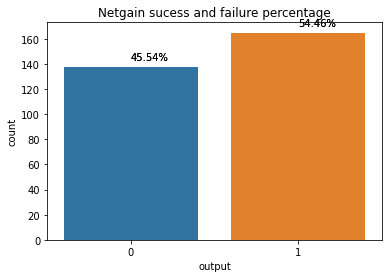

In [8]:
sns.countplot('output',data = train)    
total = float(len(train))
plt.title('Netgain sucess and failure percentage')
ax = sns.countplot(x="output", data=train)
for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x()+i.get_width()/2.,height + 5,
           '{:1.2f}'.format(height/total*100) + '%')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


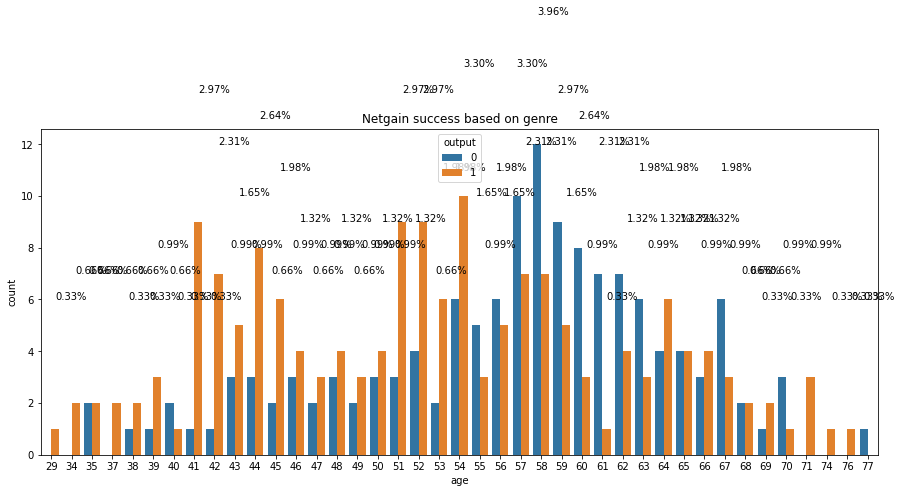

In [12]:
plt.figure(figsize=(15,6))
plt.title('Netgain success based on genre')
total = float(len(train))
ax = sns.countplot(x="age", data=train, hue = 'output')
for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x()+i.get_width()/2.,height + 5,
           '{:1.2f}'.format(height/total*100) + '%')
    

In [17]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(train['output'])
print(list(le.classes_))
train['output'] = le.transform(train['output'])
print(train.head())
train_encode = pd.get_dummies(train)
print(train_encode.shape)
train_ind = train_encode.drop(['output'],axis=1)
target = train_encode['output']
print( 'Train independent dataset shape:', train_ind.shape , 'and', 'Train target dataset shape:', target.shape)



[0, 1]
   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  
(303, 14)
Train independent dataset shape: (303, 13) and Train target dataset shape: (303,)


In [18]:
#Splitting the dataset to train and test.
X_train, X_test, y_train, y_test = train_test_split(train_ind, target, test_size=0.30, random_state=42)
print('X train size: ', X_train.shape)
print('y train size: ', y_train.shape)
print('X test size: ', X_test.shape)
print('y test size: ', y_test.shape)

X train size:  (212, 13)
y train size:  (212,)
X test size:  (91, 13)
y test size:  (91,)


In [23]:
parameters = {'max_features': [0.5,0.6,0.7,0.8,0.9,1.0], 'max_depth': [2,3,4,5,6,7], 'min_samples_leaf':[1,10,100], 'random_state':[14]} 
clf = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5, scoring='roc_auc')
clf.fit(X_train, y_train)
print('The best parameters are: ', clf.best_params_)
print('best mean cross-validated score (auc) : ', clf.best_score_)



The best parameters are:  {'max_depth': 3, 'max_features': 0.5, 'min_samples_leaf': 1, 'random_state': 14}
best mean cross-validated score (auc) :  0.8887871853546911


The precision score of decision tree on TRAIN is :  82.03 %
The accuracy score of decision tree on TRAIN is :  84.43 %
The precision score of decision tree on TEST is :  83.67 %
The accuracy score of decision tree on TEST is :  81.32 %


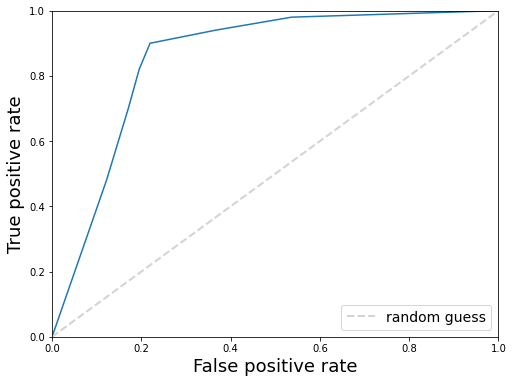

In [24]:
from sklearn.metrics import precision_score, accuracy_score
x_actual, x_pred = y_train, clf.predict(X_train)
precision_score_DT_train = precision_score(x_actual, x_pred)
accuracy_score_DT_train = accuracy_score(x_actual, x_pred)
print('The precision score of decision tree on TRAIN is : ',round(precision_score_DT_train * 100,2), '%')
print('The accuracy score of decision tree on TRAIN is : ',round(accuracy_score_DT_train * 100,2), '%')

y_actual, y_pred = y_test, clf.predict(X_test)
precision_score_DT_test =  precision_score(y_actual, y_pred)
accuracy_score_DT_test = accuracy_score(y_actual, y_pred)
print('The precision score of decision tree on TEST is : ',round(precision_score_DT_test * 100,2), '%')
print('The accuracy score of decision tree on TEST is : ',round(accuracy_score_DT_test * 100,2), '%')


#Now let's plot the ROC curve and calculate AUC on the test set
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
adsu = clf.predict_proba(X_test)[:,1]
plt.subplots(figsize=(8,6))
fpr, tpr, thresholds = roc_curve(y_test, adsu)
plt.plot(fpr, tpr)
x = np.linspace(0,1,num=50)
plt.plot(x,x,color='lightgrey',linestyle='--',marker='',lw=2,label='random guess')
plt.legend(fontsize = 14)
plt.xlabel('False positive rate', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

In [27]:
#getting the confusion matrix for the classification model
from sklearn.metrics import confusion_matrix # cofusion matrix / accuracy
print ('Confusion Matrix TRAIN:\n', confusion_matrix(y_train,x_pred))
print ('\nConfusion Matrix TEST:\n', confusion_matrix(y_test,y_pred))
AUC_DT = auc(fpr,tpr)
print('DT AUC is: ', round(AUC_DT * 100,2), '%')



Confusion Matrix TRAIN:
 [[ 74  23]
 [ 10 105]]

Confusion Matrix TEST:
 [[33  8]
 [ 9 41]]
DT AUC is:  85.49 %


In [28]:
# getting the classification report of the classification models
from sklearn.metrics import classification_report 
print ('Classification Report TRAIN:\n', classification_report(y_train,x_pred))
print ('\nClassification Report TEST:\n', classification_report(y_test,y_pred))




Classification Report TRAIN:
               precision    recall  f1-score   support

           0       0.88      0.76      0.82        97
           1       0.82      0.91      0.86       115

    accuracy                           0.84       212
   macro avg       0.85      0.84      0.84       212
weighted avg       0.85      0.84      0.84       212


Classification Report TEST:
               precision    recall  f1-score   support

           0       0.79      0.80      0.80        41
           1       0.84      0.82      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [30]:
#Single Logistic Regression
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state=0, solver='lbfgs') 
log.fit(X_train, y_train)

y_pred = log.predict(X_test)


precision of single logistic regression classifier on the train set: 84.8 %
accuracy of single logistic regression classifier on the train set:  86.79 %


In [31]:
from sklearn.metrics import precision_score, accuracy_score
x_actual, x_pred = y_train, log.predict(X_train)
precision_score_LG_train = precision_score(x_actual, x_pred)
accuracy_score_LG_train = accuracy_score(x_actual, x_pred)
print('precision of single logistic regression classifier on the train set:',round(precision_score_LG_train * 100,2), '%')
print('accuracy of single logistic regression classifier on the train set: ',round(accuracy_score_LG_train * 100,2), '%')




precision of single logistic regression classifier on the train set: 84.8 %
accuracy of single logistic regression classifier on the train set:  86.79 %


In [32]:
from sklearn.metrics import precision_score, accuracy_score
y_actual, y_pred = y_test, log.predict(X_test)
precision_score_LG_test = precision_score(y_actual, y_pred)
accuracy_score_LG_test = accuracy_score(y_actual, y_pred)
print('precision of single logistic regression classifier on the test set:',round(precision_score_LG_test * 100,2), '%')
print('accuracy of single logistic regression classifier on the test set: ',round(accuracy_score_LG_test * 100,2), '%')



precision of single logistic regression classifier on the test set: 82.35 %
accuracy of single logistic regression classifier on the test set:  81.32 %


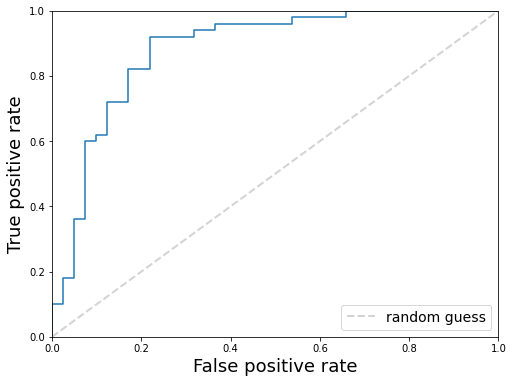

In [33]:
logauc = log.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, logauc)

plt.subplots(figsize=(8,6))
plt.plot(fpr, tpr)
x = np.linspace(0,1,num=50)
plt.plot(x,x,color='lightgrey',linestyle='--',marker='',lw=2,label='random guess')
plt.legend(fontsize = 14)
plt.xlabel('False positive rate', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

In [34]:
AUC_logsin = auc(fpr,tpr)
print('single Logistic regression AUC is: ', round(AUC_logsin *100,2),'%')

from sklearn.metrics import confusion_matrix # cofusion matrix / accuracy
print ('Confusion Matrix TRAIN:\n', confusion_matrix(y_train,x_pred))
print ('\nConfusion Matrix TEST:\n', confusion_matrix(y_test,y_pred))

# getting the classification report of the classification models
from sklearn.metrics import classification_report 
print ('Classification Report TRAIN:\n', classification_report(y_train,x_pred))
print ('\nClassification Report TEST:\n', classification_report(y_test,y_pred))

single Logistic regression AUC is:  88.1 %
Confusion Matrix TRAIN:
 [[ 78  19]
 [  9 106]]

Confusion Matrix TEST:
 [[32  9]
 [ 8 42]]
Classification Report TRAIN:
               precision    recall  f1-score   support

           0       0.90      0.80      0.85        97
           1       0.85      0.92      0.88       115

    accuracy                           0.87       212
   macro avg       0.87      0.86      0.87       212
weighted avg       0.87      0.87      0.87       212


Classification Report TEST:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [35]:
# Single SVM
from sklearn.svm import SVC
svmClf = SVC(probability=True)
svmClf.fit(X_train, y_train)



SVC(probability=True)

In [36]:
x_actual, x_pred = y_train, svmClf.predict(X_train)
precision_score_SVM_train = precision_score(x_actual, x_pred)
accuracy_score_SVM_train = accuracy_score(x_actual, x_pred)
print('precision of single SVM on the train set:',round(precision_score_SVM_train * 100,2), '%')
print('accuracy of single SVM on the train set: ',round(accuracy_score_SVM_train * 100,2), '%')

y_actual, y_pred = y_test, svmClf.predict(X_test)
precision_score_SVM_test = precision_score(y_actual, y_pred)
accuracy_score_SVM_test = accuracy_score(y_actual, y_pred)
print('precision of single SVM on the test set: ', round(precision_score_SVM_test*100,2),'%')
print('accuracy of single SVM on the test set: ', round(accuracy_score_SVM_test*100,2),'%')



precision of single SVM on the train set: 63.69 %
accuracy of single SVM on the train set:  66.04 %
precision of single SVM on the test set:  67.16 %
accuracy of single SVM on the test set:  70.33 %


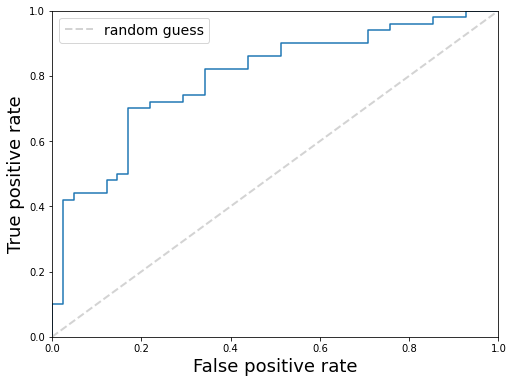

AUC for single SVM is:  79.46 %


In [40]:
svmprob = svmClf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, svmprob)

plt.subplots(figsize=(8,6))
plt.plot(fpr, tpr)
x = np.linspace(0,1,num=50)
plt.plot(x,x,color='lightgrey',linestyle='--',marker='',lw=2,label='random guess')
plt.legend(fontsize = 14)
plt.xlabel('False positive rate', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()
print('AUC for single SVM is: ', round(auc(fpr,tpr)*100,2),'%')


In [39]:


#getting the confusion matrix for the classification model
from sklearn.metrics import confusion_matrix # cofusion matrix / accuracy
print ('Confusion Matrix of single SVM TRAIN:\n', confusion_matrix(y_train,x_pred))
print ('\nConfusion Matrix of single SVM TEST:\n', confusion_matrix(y_test,y_pred))

from sklearn.metrics import classification_report 
print ('Classification Report of single SVM TRAIN:\n', classification_report(y_train,x_pred))
print ('\nClassification Report of single SVM TEST:\n', classification_report(y_test,y_pred))



Confusion Matrix of single SVM TRAIN:
 [[ 40  57]
 [ 15 100]]

Confusion Matrix of single SVM TEST:
 [[19 22]
 [ 5 45]]
Classification Report of single SVM TRAIN:
               precision    recall  f1-score   support

           0       0.73      0.41      0.53        97
           1       0.64      0.87      0.74       115

    accuracy                           0.66       212
   macro avg       0.68      0.64      0.63       212
weighted avg       0.68      0.66      0.64       212


Classification Report of single SVM TEST:
               precision    recall  f1-score   support

           0       0.79      0.46      0.58        41
           1       0.67      0.90      0.77        50

    accuracy                           0.70        91
   macro avg       0.73      0.68      0.68        91
weighted avg       0.73      0.70      0.69        91



In [43]:
# Ensemble of several different types of models: voting classifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
rfClf = RandomForestClassifier(n_estimators=500, random_state=0) # 500 trees. 
svmClf = SVC(probability=True, random_state=0) # probability calculation
logClf = LogisticRegression(random_state=0)
nbclf = GaussianNB()

# constructing the ensemble classifier by mentioning the individual classifiers.
clf2 = VotingClassifier(estimators = [('rf',rfClf), ('svm',svmClf), ('log', logClf),('nb',nbclf)], voting='soft') 

# train the ensemble classifier
clf2.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=500,
                                                     random_state=0)),
                             ('svm', SVC(probability=True, random_state=0)),
                             ('log', LogisticRegression(random_state=0)),
                             ('nb', GaussianNB())],
                 voting='soft')

In [44]:
from sklearn.metrics import precision_score, accuracy_score
x_actual, x_pred = y_train, clf2.predict(X_train)
precision_score_VC_train = precision_score(x_actual, x_pred)
accuracy_score_VC_train = accuracy_score(x_actual, x_pred)
print('The precision score of Voting classifier on TRAIN is : ',round(precision_score_VC_train * 100,2), '%')
print('The accuracy score of Voting classifier on TRAIN is : ',round(accuracy_score_VC_train * 100,2), '%')

from sklearn.metrics import precision_score, accuracy_score
y_actual, y_pred = y_test, clf2.predict(X_test)
precision_score_VC_test = precision_score(y_actual, y_pred)
accuracy_score_VC_test = accuracy_score(y_actual, y_pred)
print('The precision score of Voting classifier on Test is : ',round(precision_score_VC_test * 100,2), '%')
print('The accuracy score of Voting classifier on Test is : ',round(accuracy_score_VC_test * 100,2), '%')



The precision score of Voting classifier on TRAIN is :  88.52 %
The accuracy score of Voting classifier on TRAIN is :  90.09 %
The precision score of Voting classifier on Test is :  87.76 %
The accuracy score of Voting classifier on Test is :  85.71 %


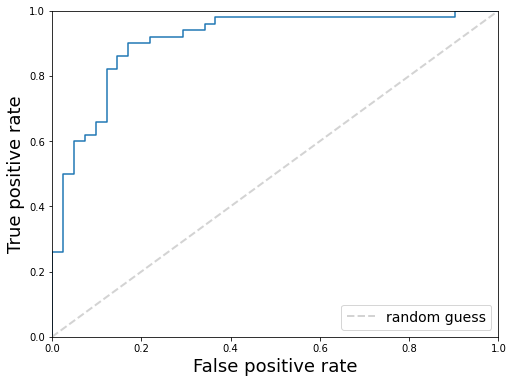

VC AUC is:  90.93 %


In [45]:
#Now let's plot the ROC curve and calculate AUC on the test set
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
adsu = clf2.predict_proba(X_test)[:,1]
plt.subplots(figsize=(8,6))
fpr, tpr, thresholds = roc_curve(y_test, adsu)
plt.plot(fpr, tpr)
x = np.linspace(0,1,num=50)
plt.plot(x,x,color='lightgrey',linestyle='--',marker='',lw=2,label='random guess')
plt.legend(fontsize = 14)
plt.xlabel('False positive rate', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

AUC_VC = auc(fpr,tpr)
print('VC AUC is: ', round(AUC_VC * 100,2), '%')

In [46]:
#getting the confusion matrix for the classification model
from sklearn.metrics import confusion_matrix # cofusion matrix / accuracy
print ('Confusion Matrix TRAIN:\n', confusion_matrix(y_train,x_pred))
print ('\nConfusion Matrix TEST:\n', confusion_matrix(y_test,y_pred))

# getting the classification report of the classification models
from sklearn.metrics import classification_report 
print ('Classification Report TRAIN:\n', classification_report(y_train,x_pred))
print ('\nClassification Report TEST:\n', classification_report(y_test,y_pred))

Confusion Matrix TRAIN:
 [[ 83  14]
 [  7 108]]

Confusion Matrix TEST:
 [[35  6]
 [ 7 43]]
Classification Report TRAIN:
               precision    recall  f1-score   support

           0       0.92      0.86      0.89        97
           1       0.89      0.94      0.91       115

    accuracy                           0.90       212
   macro avg       0.90      0.90      0.90       212
weighted avg       0.90      0.90      0.90       212


Classification Report TEST:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84        41
           1       0.88      0.86      0.87        50

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91



In [47]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

svmClfbag = BaggingClassifier(SVC(C=1.0, kernel='linear', degree=5, gamma='auto', coef0=0.0, shrinking=True, probability=True,tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, random_state=None))
svmClfbag.fit(X_train, y_train)

x_actual, x_pred = y_train, svmClfbag.predict(X_train)
precision_score_VC_train = precision_score(x_actual, x_pred)
accuracy_score_VC_train = accuracy_score(x_actual, x_pred)
print('The precision score of multiple SVM on TRAIN is : ',round(precision_score_VC_train * 100,2), '%')
print('The accuracy score of multiple SVM on TRAIN is : ',round(accuracy_score_VC_train * 100,2), '%')
#print(svmClfbag.oob_score_)

y_pred = svmClfbag.predict(X_test)

print('precision of multiple SVM  on the test set: ', round(precision_score(y_test, y_pred)*100,2),'%')
print('accuracy of multiple SVM on the test set: ', round(accuracy_score(y_test, y_pred)*100,2),'%')



KeyboardInterrupt: 